<a href="https://colab.research.google.com/github/Daniel-ASG/IMERSAO_DADOS_ALURA/blob/main/IMERS%C3%83O_DADOS_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMERSÃO DE DADOS ALURA

####Vamos iniciar carregando algumas bibliotecas e criando o primeiro Dataset.
Como a base de dados é imensa (possui mais de 3GB) criaremos alguns Datasets ao longo da análise a medida que for necessário carregar novos dados

###Importar bibliotecas

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import time
import plotly.express as px

###Carregar o dataset

In [2]:
start_time = time.time() # essa linha dá o start para contar o tempo em que essa célula irá gastar para realizar o carregamento

# a variável "colunas" serve para selecinar quais colunas da fonte iremos utilizar e evitar carregar dados desnecessários para a análise atual
# Podemos saber o que cada coluna significa verificando o dicionário
colunas = ['NU_INSCRICAO', 'CO_MUNICIPIO_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
           'NU_IDADE', 'IN_TREINEIRO', 'TP_SEXO', 'TP_COR_RACA', 
           'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NU_NOTA_LC', 'TP_LINGUA',
           'Q001', 'Q002', 'Q003', 'Q004', 'Q006', 'Q025']

                                                                                                                                                #   usecols seleciona as colunas que serão carregadas
dados = pd.read_csv('/content/drive/My Drive/Analise_de_dados/microdados_enem_2019/DADOS/MICRODADOS_ENEM_2019.csv', sep=";", encoding='ISO-8859-1', usecols=colunas)

print(f"{(time.time() - start_time):.2f} seconds") # exibe o tempo de carregamento do dataset

26.33 seconds


In [3]:
dados.head()

,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q006,Q025
0,190001004627,1506807,Santarém,15,PA,21,M,3,0,472.9,466.0,497.3,369.1,0,780.0,D,E,A,A,B,A
1,190001004628,1504059,Mãe do Rio,15,PA,16,F,3,1,358.9,495.4,482.3,416.5,1,600.0,D,E,A,A,B,A
2,190001004629,1505502,Paragominas,15,PA,18,F,1,0,574.2,538.7,582.6,571.5,0,640.0,H,E,A,D,C,B
3,190001004630,1507706,São Sebastião da Boa Vista,15,PA,23,M,3,0,NaN,NaN,NaN,NaN,1,NaN,D,D,A,B,C,A
4,190001004631,1503903,Juruti,15,PA,23,M,3,0,NaN,NaN,NaN,NaN,1,NaN,B,C,A,A,C,A


In [4]:
dados.shape

(5095270, 21)

###Visualizações

####Usando Matplotlib

Text(0.5, 1.0, 'Quantidade de candidatos do ENEM-2019 por UF')

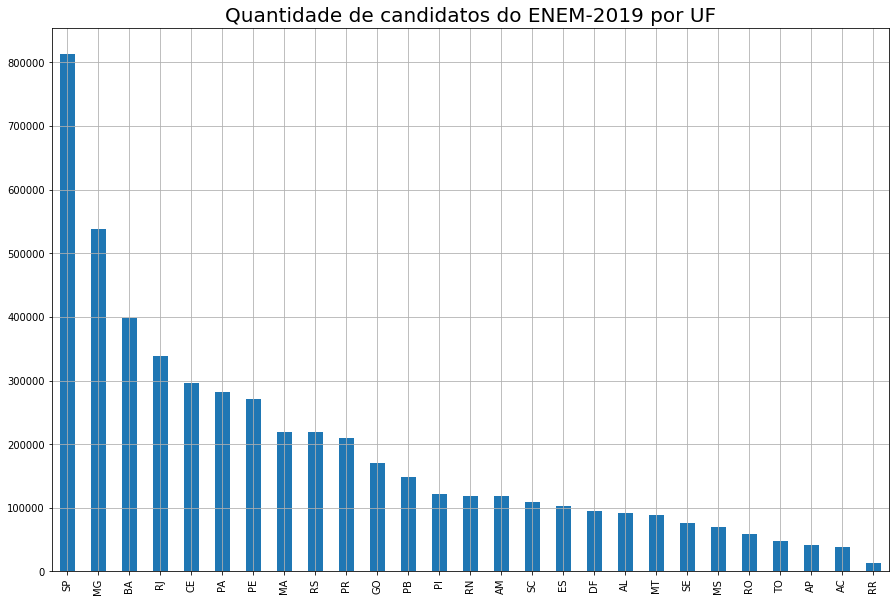

In [5]:
# dados['SG_UF_RESIDENCIA'] ->      seleção da coluna           
# value_counts()            ->      faz a contagem dos valores que estão na coluna selecionada
dados['SG_UF_RESIDENCIA'].value_counts().plot.bar(figsize=(15,10), grid=True)
plt.title('Quantidade de candidatos do ENEM-2019 por UF', fontsize=20)

####Usando plotly.express

In [13]:
# dados[['SG_UF_RESIDENCIA', 'NU_INSCRICAO']]                                               ->      seleciona apenas as colunas desejadas
# rename(columns={'NU_INSCRICAO': 'QUANTIDADE', 'SG_UF_RESIDENCIA': 'UNIDADE_FEDERATIVA'})  ->      renomeia as colunas escolhidas
# groupby(by=['UNIDADE_FEDERATIVA']).count()                                                ->      agrega os dados pelo critério escolhido e realiza a contagem dos valores desses dados agregados
UF_RESIDENCIA_quant = dados[['SG_UF_RESIDENCIA', 'NU_INSCRICAO']].rename(columns={'NU_INSCRICAO': 'QUANTIDADE', 'SG_UF_RESIDENCIA': 'UNIDADE_FEDERATIVA'}).groupby(by=['UNIDADE_FEDERATIVA']).count()

# cria uma nova coluna no dataframe que será igual à coluna de índices ('UNIDADE_FEDERATIVA')
UF_RESIDENCIA_quant['UNIDADE_FEDERATIVA'] = UF_RESIDENCIA_quant.index

# ordena os dados de acordo com os valores da coluna indicada e substitui o dataframe original pelo resultante (equivalente a UF_RESIDENCIA_quant = ...)
UF_RESIDENCIA_quant.sort_values(by='QUANTIDADE', ascending=False, inplace=True)

In [14]:
UF_RESIDENCIA_quant.head()

,QUANTIDADE,UNIDADE_FEDERATIVA
UNIDADE_FEDERATIVA,,
SP,813772,SP
MG,538896,MG
BA,398095,BA
RJ,338710,RJ
CE,295870,CE


In [16]:
# fig = px.bar(UF_RESIDENCIA_quant, x='ESTADO', y='QUANTIDADE', color='QUANTIDADE', color_continuous_scale=[(0,"black"), (1,"gray")])
fig = px.bar(UF_RESIDENCIA_quant, x='UNIDADE_FEDERATIVA', y='QUANTIDADE', color='QUANTIDADE')
fig.update_layout(height=600, title_text="Quantidade de candidatos do ENEM-2019 por UF", title_font = {"size": 30})
fig.show()